In [ ]:
'''
df_caso_7_1.ipynb
'''

In [1]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
from sklearn import metrics
import joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [2]:
path = "/home/nacho/Documents/coronavirus/COVID-19_Paper/"
os.chdir(os.path.join(path)) 

In [3]:
label = 'INTUBADO'
df_data = pd.read_csv("prediction_data/completed_datasets/df_caso_7_1.zip")
X = df_data.loc[:, df_data.columns != label]
y = df_data.loc[:, label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y, shuffle=True)

In [4]:
grid = joblib.load('models/all_data/20_80/df_caso_7_1_grid.pkl')
grid_report = pd.read_csv("models/all_data/20_80/df_caso_7_1_grid_report.csv", index_col=0)
grid_scores = pd.read_csv("models/all_data/20_80/df_caso_7_1_df_grid.csv", index_col=0)

/home/nacho/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [5]:
grid_report

,precision,recall,f1-score,support
0,0.472488,0.529857,0.499531,2512.000000
1,0.607511,0.551599,0.578207,3314.000000
accuracy,0.542225,0.542225,0.542225,0.542225
macro avg,0.540000,0.540728,0.538869,5826.000000
weighted avg,0.549293,0.542225,0.544284,5826.000000


In [6]:
grid_scores.head()

,param_clf__selected_model,params,mean_fit_time,std_fit_time,mean_test_ba,std_test_ba,rank_test_ba,mean_test_ap,std_test_ap,rank_test_ap,mean_test_ra,std_test_ra,rank_test_ra,mean_test_F1,std_test_F1,rank_test_F1
53,"('brf', {'criterion': 'entropy', 'max_depth': ...","{'clf__selected_model': ('brf', {'criterion': ...",2.301849,0.100880,0.535881,0.004810,1,0.602360,0.005124,28,0.548678,0.006435,25,0.578831,0.006050,42
12,"('brf', {'criterion': 'entropy', 'max_depth': ...","{'clf__selected_model': ('brf', {'criterion': ...",3.581364,0.809425,0.535455,0.008588,2,0.603320,0.007337,21,0.548393,0.009636,26,0.586324,0.010743,38
23,"('brf', {'criterion': 'gini', 'max_depth': 45,...","{'clf__selected_model': ('brf', {'criterion': ...",4.498846,0.663745,0.535444,0.005485,3,0.602750,0.005483,25,0.549157,0.006678,23,0.580100,0.005425,41
33,"('brf', {'criterion': 'entropy', 'max_depth': ...","{'clf__selected_model': ('brf', {'criterion': ...",2.952797,0.613573,0.535432,0.008276,4,0.603803,0.007125,18,0.548199,0.009299,29,0.585287,0.011471,39
59,"('brf', {'criterion': 'gini', 'max_depth': 1, ...","{'clf__selected_model': ('brf', {'criterion': ...",1.080742,0.031264,0.534950,0.007744,5,0.603740,0.007612,19,0.548351,0.009469,28,0.587433,0.013892,37


In [8]:
list(grid.cv_results_)

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_clf__selected_model',
 'params',
 'split0_test_ba',
 'split1_test_ba',
 'split2_test_ba',
 'split3_test_ba',
 'split4_test_ba',
 'split5_test_ba',
 'split6_test_ba',
 'split7_test_ba',
 'split8_test_ba',
 'split9_test_ba',
 'split10_test_ba',
 'split11_test_ba',
 'split12_test_ba',
 'split13_test_ba',
 'split14_test_ba',
 'mean_test_ba',
 'std_test_ba',
 'rank_test_ba',
 'split0_train_ba',
 'split1_train_ba',
 'split2_train_ba',
 'split3_train_ba',
 'split4_train_ba',
 'split5_train_ba',
 'split6_train_ba',
 'split7_train_ba',
 'split8_train_ba',
 'split9_train_ba',
 'split10_train_ba',
 'split11_train_ba',
 'split12_train_ba',
 'split13_train_ba',
 'split14_train_ba',
 'mean_train_ba',
 'std_train_ba',
 'split0_test_ap',
 'split1_test_ap',
 'split2_test_ap',
 'split3_test_ap',
 'split4_test_ap',
 'split5_test_ap',
 'split6_test_ap',
 'split7_test_ap',
 'split8_test_ap',
 'split9_test_ap',
 'split10_test_

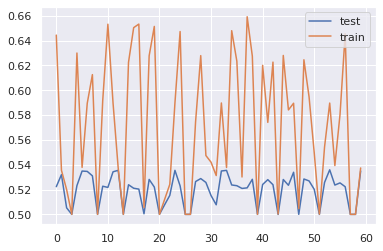

In [9]:
test_scores = grid.cv_results_['mean_test_ba']
train_scores = grid.cv_results_['mean_train_ba'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [10]:
pd.DataFrame(X_train.iloc[20, :])

,12810
SEXO,0
EDAD,72
EMBARAZO,0
DIABETES,0
EPOC,0
ASMA,0
INMUSUPR,0
HIPERTENSION,1
CARDIOVASCULAR,0
OBESIDAD,1


In [11]:
y_train.iloc[20]

1

In [12]:
print("best score from grid search: %f" % grid.best_estimator_.score(X_test, y_test))

print("model prediction: ", grid.predict(pd.DataFrame(X_train.iloc[20, :].values.reshape(1, -1), columns = X_train.columns)))

print("model prediction probability: ",grid.predict_proba(pd.DataFrame(X_train.iloc[20, :].values.reshape(1, -1), columns = X_train.columns)))

best score from grid search: 0.572091
model prediction:  [1]
model prediction probability:  [[0.45157285 0.54842715]]


In [13]:
grid.best_params_

{'clf__selected_model': ('brf',
  {'criterion': 'entropy',
   'max_depth': 45,
   'max_features': 'auto',
   'min_samples_leaf': 10,
   'min_samples_split': 3,
   'n_estimators': 155})}

In [ ]:
#%%Pipeline without gridsearchcv

In [14]:
num_transformer=Pipeline(steps=[
    ('scaler',MinMaxScaler())])

preprocessor=ColumnTransformer(
    remainder='passthrough',
    transformers=[('num',num_transformer,['EDAD'])])

model=Pipeline([
    ('preprocessor',preprocessor),
    ('brf', BalancedRandomForestClassifier())
    ])

In [15]:
params = grid.best_params_['clf__selected_model'][1]

In [16]:
params

{'criterion': 'entropy',
 'max_depth': 45,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 3,
 'n_estimators': 155}

In [17]:
params['brf__criterion'] = params.pop('criterion')
params['brf__max_depth'] = params.pop('max_depth')
params['brf__max_features'] = params.pop('max_features')
params['brf__min_samples_leaf'] = params.pop('min_samples_leaf')
params['brf__min_samples_split'] = params.pop('min_samples_split')
params['brf__n_estimators'] = params.pop('n_estimators')

In [18]:
params

{'brf__criterion': 'entropy',
 'brf__max_depth': 45,
 'brf__max_features': 'auto',
 'brf__min_samples_leaf': 10,
 'brf__min_samples_split': 3,
 'brf__n_estimators': 155}

In [19]:
model.set_params(**params)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['EDAD'])])),
                ('brf',
                 BalancedRandomForestClassifier(criterion='entropy',
                                                max_depth=45,
                                                min_samples_leaf=10,
                                                min_samples_split=3,
                                                n_estimators=155))])

In [20]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['EDAD'])])),
                ('brf',
                 BalancedRandomForestClassifier(criterion='entropy',
                                                max_depth=45,
                                                min_samples_leaf=10,
                                                min_samples_split=3,
                                                n_estimators=155))])

In [21]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.51      0.49      2512
           1       0.60      0.56      0.58      3314

    accuracy                           0.54      5826
   macro avg       0.53      0.53      0.53      5826
weighted avg       0.54      0.54      0.54      5826



In [22]:
metrics.balanced_accuracy_score(y_test, y_pred)

0.5336614786141788

In [23]:
metrics.average_precision_score(y_test, y_pred)

0.5862422472997249

In [24]:
metrics.f1_score(y_test, y_pred)

0.5797598627787306

In [25]:
#%%se preprocesan los datos
X_train_scaled = pd.DataFrame(model.named_steps['preprocessor'].fit_transform(X_train),columns = X_train.columns)
X_test_scaled = pd.DataFrame(model.named_steps['preprocessor'].fit_transform(X_test),columns = X_test.columns)

In [26]:
#cambia el orden de edad y sexo
X_train_scaled[['EDAD','SEXO']]=X_train_scaled[['SEXO','EDAD']]
X_test_scaled[['EDAD','SEXO']]=X_test_scaled[['SEXO','EDAD']]

In [27]:
X_test_scaled.iloc[20, :]

SEXO              1.000000
EDAD              0.524752
EMBARAZO          0.000000
DIABETES          0.000000
EPOC              0.000000
ASMA              0.000000
INMUSUPR          0.000000
HIPERTENSION      1.000000
CARDIOVASCULAR    0.000000
OBESIDAD          0.000000
RENAL_CRONICA     0.000000
TABAQUISMO        0.000000
Name: 20, dtype: float64

In [28]:
y_test.iloc[20]

1

In [31]:
model.named_steps['brf'].predict(X_test_scaled.iloc[20, :].values.reshape(1, -1))

array([0])

In [32]:
model.named_steps['brf'].predict_proba(X_test_scaled.iloc[20, :].values.reshape(1, -1))

array([[0.56694239, 0.43305761]])

In [ ]:
# use Kernel SHAP to explain test set predictions

In [33]:
import shap

In [34]:
num_features = len(X_test.columns)

In [35]:
num_features

12

In [42]:
explainer = shap.KernelExplainer(model = model.named_steps['brf'].predict_proba, data = X_train_scaled, link = 'logit')

shap_values = explainer.shap_values(X_test_scaled.iloc[20])

#shap_values = explainer.shap_values(X = X_test_scaled.iloc[20], nsamples = 30, l1_reg="num_features("+str(num_features)+")")

Using 23302 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.

KeyboardInterrupt



In [ ]:
#feature importance 